## Feature Selection techniques

Referred from : https://www.kaggle.com/pierpaolo28/mushrooms-selection/comments#Mushroom-Classification

https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

Very good go to source for feature selection techniques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import time

import os

In [3]:
df = pd.read_csv('mushrooms.csv')
df.shape

(8124, 23)

In [4]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
percentage_missing = df.isnull().sum() * 100 / len(df)
percentage_missing

missing_values = pd.DataFrame({'percent_missing': percentage_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
class,0.0
stalk-surface-above-ring,0.0
population,0.0
spore-print-color,0.0
ring-type,0.0
ring-number,0.0
veil-color,0.0
veil-type,0.0
stalk-color-below-ring,0.0
stalk-color-above-ring,0.0


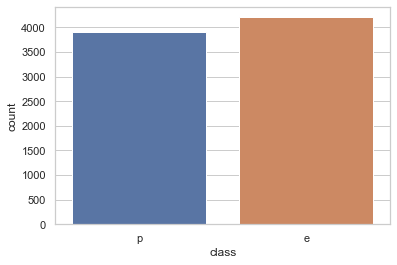

In [6]:
sns.set(style='whitegrid')
sns.countplot(x='class',data=df)
plt.show()

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### Handling categorical features

#### One-Hot-Encoding

In [8]:

X = df.drop(['class'] ,axis=1)
Y = df['class']

print(X.shape)
print(Y.shape)

#one hot encoding X

X = pd.get_dummies(X,prefix_sep='_')
X.head()

#label encoding Y
Y = LabelEncoder().fit_transform(Y)
Y

(8124, 22)
(8124,)


array([1, 0, 0, ..., 0, 1, 0])

#### Splitting data to train, test set

In [9]:
X2 = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, Y , test_size=0.30,random_state=100)

#### Logistic Regression

In [10]:

start = time.process_time()


model_log = LogisticRegression().fit(X_train,y_train)
print(time.process_time() - start)

pred = model_log.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.24968400000000024
[[1258    0]
 [   0 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



/Users/praveen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Linear SVM

In [11]:
start = time.process_time()
model_svm = svm.LinearSVC().fit(X_train,y_train)
print(time.process_time()-start)

pred = model_svm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.4366840000000005
[[1258    0]
 [   0 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



/Users/praveen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Decision tree

In [12]:
start = time.process_time()

model_dt = tree.DecisionTreeClassifier().fit(X_train,y_train)
print(time.process_time() - start)

pred = model_dt.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.049450000000000216
[[1258    0]
 [   0 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



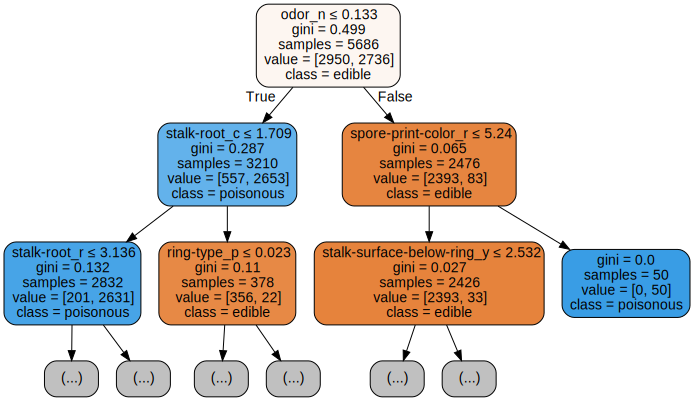

In [75]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(model_dt, out_file=None, feature_names=X.columns, class_names=['edible','poisonous'],
                      filled=True, rounded=True,
                      max_depth=2,
                      special_characters=True)
graph= graphviz.Source(data)
graph

#### Random forest

In [13]:
## Random forest alogithm helps us to rank the usefull features to our model

start = time.process_time()
model_RF = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
print(time.process_time() - start)
pred =  model_RF.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

3.801398
[[1258    0]
 [   0 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



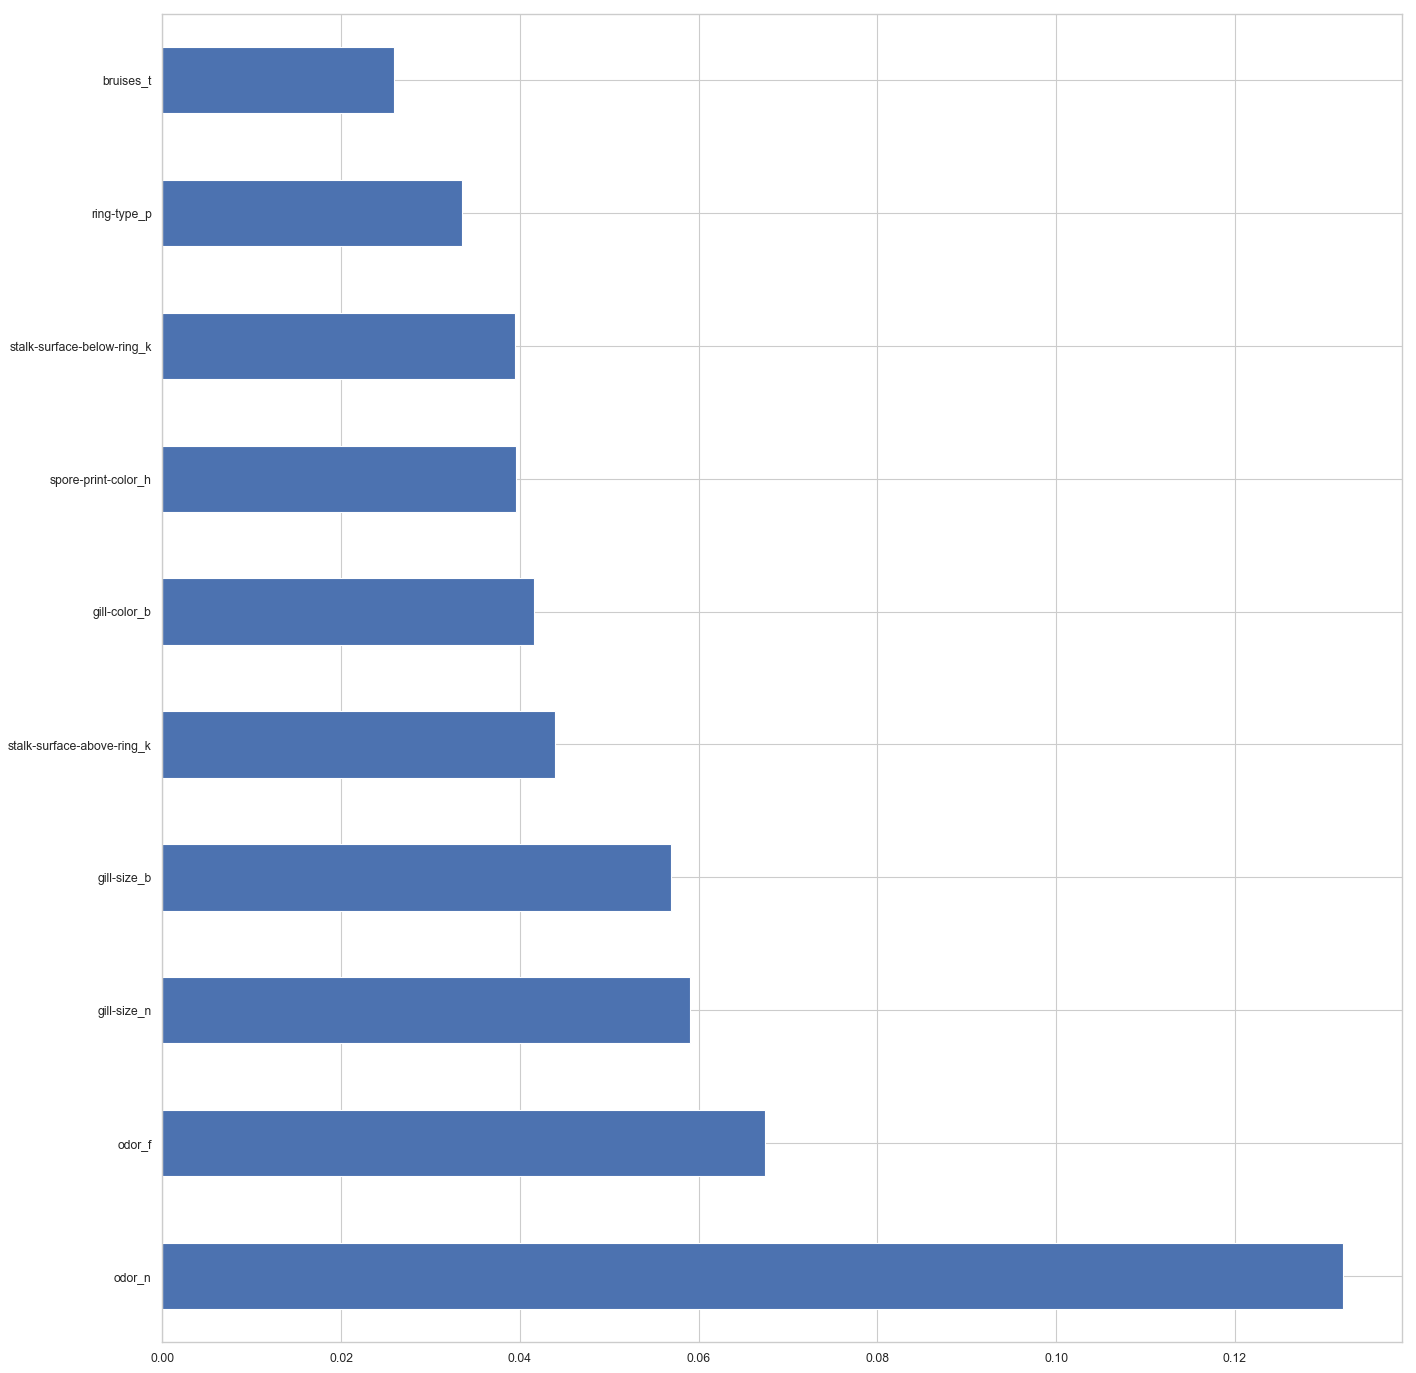

In [67]:
# Feature importance plot

plt.figure(num=None, figsize=(20,22), dpi=80, facecolor='w', edgecolor='k')
feature_imp = pd.Series(model_RF.feature_importances_, index=X.columns)
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp.nlargest(10).plot(kind='barh')



In [14]:
X_reduced = X[['odor_n','odor_f','gill-size_n','gill-size_b']]

X_reduced = StandardScaler().fit_transform(X_reduced)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_reduced, Y, test_size=0.3, random_state=101)

print(X_train_new.shape)
print(y_train_new.shape)

start = time.process_time()
model_RF = RandomForestClassifier(n_estimators=700).fit(X_train_new, y_train_new)
print(time.process_time()-start)

pred = model_RF.predict(X_test_new)

print(confusion_matrix(y_test_new,pred))
print(classification_report(y_test_new,pred))

(5686, 4)
(5686,)
2.066674000000001
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### Instead of using 117 features (after encoding) we have just used top 4 features based on importance ranking, accuracy decreased by only 3 precent. but Training time decreased to half ( from 2.5 sec to 1.3 secs)

### Feature importance by DT

#### By looking at DT, we can observe most usefull features DT used for training model. Features which are in top of DT usually are the important ones.

In [15]:
# By observing above plotted decision tree few feature which are at top of DT can be considered as important features


X_reduced = X[['odor_n','stalk-root_c','spore-print-color_r','stalk-root_r','stalk-surface-below-ring_y','ring-type_p']]

X_reduced = StandardScaler().fit_transform(X_reduced)

X_train_new_2, X_test_new_2, y_train_new_2, y_test_new_2 = train_test_split(X_reduced, Y, test_size=0.3, random_state=101)

print(X_train_new_2.shape)
print(y_train_new_2.shape)

start = time.process_time()
model_DT = tree.DecisionTreeClassifier().fit(X_train_new_2, y_train_new_2)
print(time.process_time()-start)

pred = model_DT.predict(X_test_new_2)

print(confusion_matrix(y_test_new_2,pred))
print(classification_report(y_test_new_2,pred))

(5686, 6)
(5686,)
0.0028799999999993275
[[1248   26]
 [   3 1161]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1274
           1       0.98      1.00      0.99      1164

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



### Recursive Feature elimination (RFE)

Recursive Feature Elimination (RFE) takes as input the instance of a Machine Learning model and the final desired number of features to use. It then recursively reduces the number of features to use by ranking them using the Machine Learning model accuracy as metrics.

Using RFE support method, we can then find out the names of the features which have been evaluated as most important rfe.support_ return a boolean list in which TRUE represent that a feature is considered as important and FALSE represent that a feature is not considered important

In [ ]:
# Here we are not training any model
# we are training rfe which will identify important features which later can be used in our model
# RFE takes 2 params, 1. which model/algorithm we would like to apply, 2. how many imp features to be identified

from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model,4)

rfe.fit_transform(X_train,y_train)

print('number of features',rfe.n_features_)
print('Selected features:')

colcheck = pd.Series(rfe.support_ , index=list(X.columns))
print(colcheck[colcheck==True])

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model,4)

start = time.process_time()

#RFE will give important n features ( 4 features in this ex)
RFE_X_train = rfe.fit_transform(X_train, y_train)
RFE_X_test = rfe.transform(X_test)

print(RFE_X_train.shape) 
print(RFE_X_test.shape)

#Train model with only n important features
model.fit(RFE_X_train, y_train)

print(time.process_time() - start)

print('overall accuracy :', model.score(RFE_X_test,y_test))



### SelectFromModel

In [104]:
# Extremely randomized trees

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()

model = model.fit(X_train,y_train)
model = SelectFromModel(model, prefit=True)

print(time.process_time()-start)

Selected_X = model.transform(X_train)
Selected_X.shape

0.08427999999958047


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(5686, 26)

In [106]:
## Using above identified important feature now train a random forest model 

start = time.process_time()
trained_forest = RandomForestClassifier(n_estimators=700).fit(Selected_X,y_train)
print(time.process_time()-start)
Selected_X_test = model.transform(X_test)

pred = trained_forest.predict(Selected_X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.714227999999821
[[1258    0]
 [   0 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



feature ranking
1. feature 6 (0.206220)
2. feature 4 (0.126047)
3. feature 10 (0.079825)
4. feature 9 (0.078695)
5. feature 21 (0.067089)
6. feature 11 (0.051217)
7. feature 20 (0.042989)
8. feature 1 (0.035540)
9. feature 0 (0.035033)
10. feature 14 (0.027525)
11. feature 16 (0.025494)
12. feature 19 (0.025333)
13. feature 8 (0.024442)
14. feature 24 (0.022582)
15. feature 23 (0.021585)
16. feature 7 (0.019216)
17. feature 13 (0.015762)
18. feature 15 (0.015238)
19. feature 25 (0.014603)
20. feature 12 (0.014330)
21. feature 18 (0.011875)
22. feature 5 (0.010296)
23. feature 3 (0.010235)
24. feature 2 (0.010061)
25. feature 22 (0.006987)
26. feature 17 (0.001779)


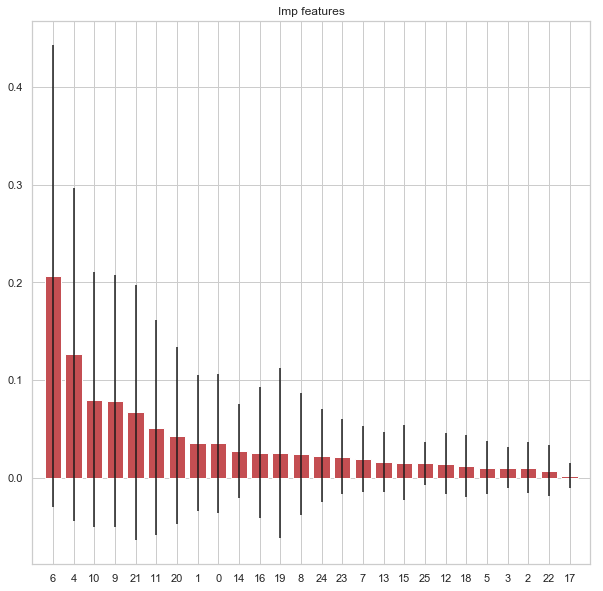

In [110]:
imp_features = trained_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_forest.estimators_],
            axis=0)
indices = np.argsort(imp_features)[::-1]

print('feature ranking')

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)"%(f+1 , indices[f], imp_features[indices[f]]))

    
plt.figure(figsize=(10,10))
plt.title("Imp features")
plt.bar(range(Selected_X.shape[1]),imp_features[indices],
       color='r', yerr=std[indices], align='center')
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1,Selected_X.shape[1]])
plt.show()

### Feature selection by observing Correlation HeatMap

Using Seaborn, we can now plot the Pearson correlation heatmap of our dataset. Inspecting this plot, we can then be able to see the correlation of our independent variables (X) with our label (Y). Finally, we can then select just the features which are most correlated

Another possible aspect to control in this analysis would be to check if the selected variables are highly correlated each other. If they are, we would then need to keep just one of the correlated ones and drop the others

In [111]:
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
Numeric_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Y
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


bruises_f                     0.501530
bruises_t                     0.501530
gill-color_b                  0.538808
gill-size_b                   0.540024
gill-size_n                   0.540024
ring-type_p                   0.540469
stalk-surface-below-ring_k    0.573524
stalk-surface-above-ring_k    0.587658
odor_f                        0.623842
odor_n                        0.785557
Y                             1.000000
Name: Y, dtype: float64

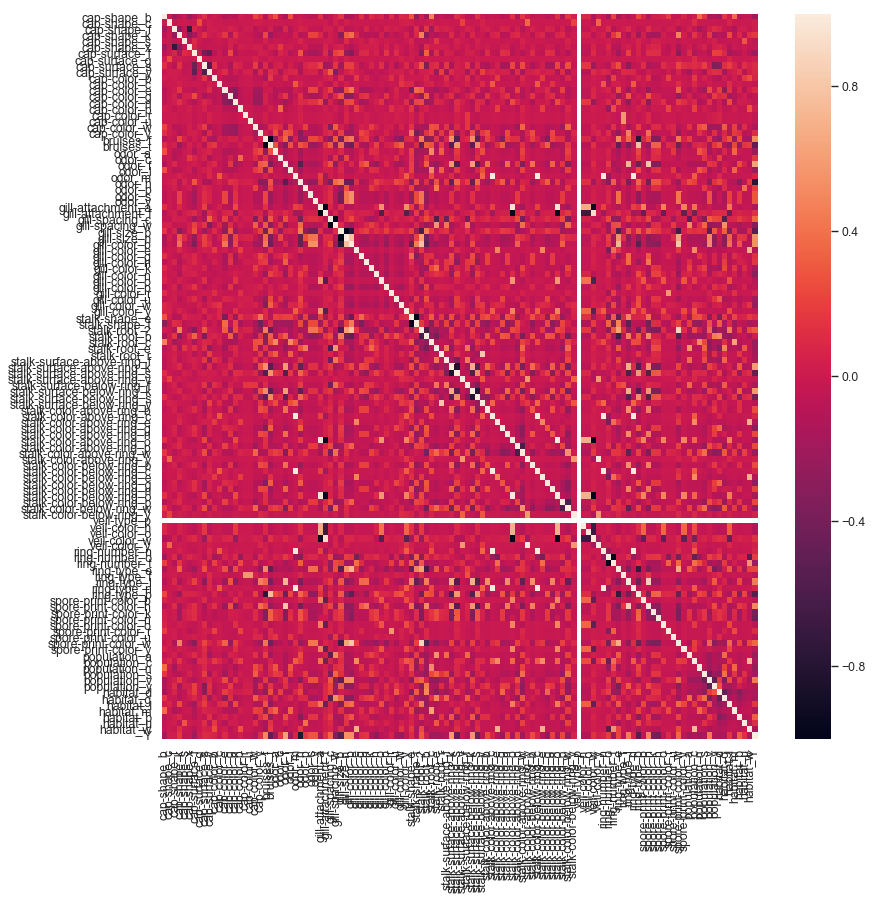

In [117]:
plt.figure(num=None,figsize=(12,12), dpi=80, facecolor='w', edgecolor='k')
corr = Numeric_df.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#In this case, we will consider just the features which are at least 0.5 correlated with the output variable.
corr_y = abs(corr['Y'])
highest_corr = corr_y[corr_y > 0.5]
highest_corr.sort_values(ascending=True)

Now train a model using features with correlation greater than 0.5

In [119]:
highest_corr.sort_values(ascending=True).index

Index(['bruises_f', 'bruises_t', 'gill-color_b', 'gill-size_b', 'gill-size_n',
       'ring-type_p', 'stalk-surface-below-ring_k',
       'stalk-surface-above-ring_k', 'odor_f', 'odor_n', 'Y'],
      dtype='object')

In [122]:
X_reduced2 = X[['bruises_f', 'bruises_t', 'gill-color_b', 'gill-size_b', 'gill-size_n',
       'ring-type_p', 'stalk-surface-below-ring_k',
       'stalk-surface-above-ring_k', 'odor_f', 'odor_n']]
X_reduced2 = StandardScaler().fit_transform(X_reduced2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_reduced2, Y, test_size=0.3, random_state=101)

start = time.process_time()

model = svm.LinearSVC().fit(X_train3, y_train3)
print(time.process_time()-start)

pred = model.predict(X_test3)

print(confusion_matrix(y_test3,pred))
print(classification_report(y_test3, pred))


0.08714400000008027
[[1248   26]
 [  46 1118]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.96      0.97      1164

   micro avg       0.97      0.97      0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Univariate Feature Selection

Univariate Feature Selection is a statistical method used to select the features which have the strongest relationship with our corrispondent labels. Using the SelectKBest method we can decide which metrics to use to evaluate our features and the number of K best features we want to keep. Different types of scoring functions are available depending on our needs:

Classification: chi2, f_classif, mutual_info_classif
Regression: f_regression, mutual_info_regression

In this example, we will be using chi2. Chi-squared (Chi2) can take as input just non-negative values, therefore, first of all we scale our input data in a range between 0 and 1.

In [124]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X2)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X,Y)


X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new, Y , test_size=0.3, random_state=101)

start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train3,y_train3)
print(time.process_time()-start)

pred = model.predict(X_test3)

print(confusion_matrix(y_test3,pred))
print(classification_report(y_test3,pred))

1.747983999999633
[[1015  259]
 [  41 1123]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1274
           1       0.81      0.96      0.88      1164

   micro avg       0.88      0.88      0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



#### Lasso Regression

When applying regularization to a Machine Learning model, we add a penalty to the model parameters so that to avoid that our model tries to resemble too closely our input data. In this way, we can make our model less complex and we can avoid overfitting (making learn to our model not just the key data characheteristics but also it's intrinsic noise).

One of the possible Regularization Methods is Lasso (L1) Regrssion. 
###### When using Lasso Regression, the coefficients of the inputs features gets shrinken if they are not positively contributing towards our Machine Learning model training. In this way, some of the features might get automatically discarded assigning them coefficients equal to zero.

In [125]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_train,y_train)

print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:-1]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.0003932853158815253
LassoCV Model Accuracy:  0.9992196926473422
Variables Eliminated:  63
Variables Kept:  54


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

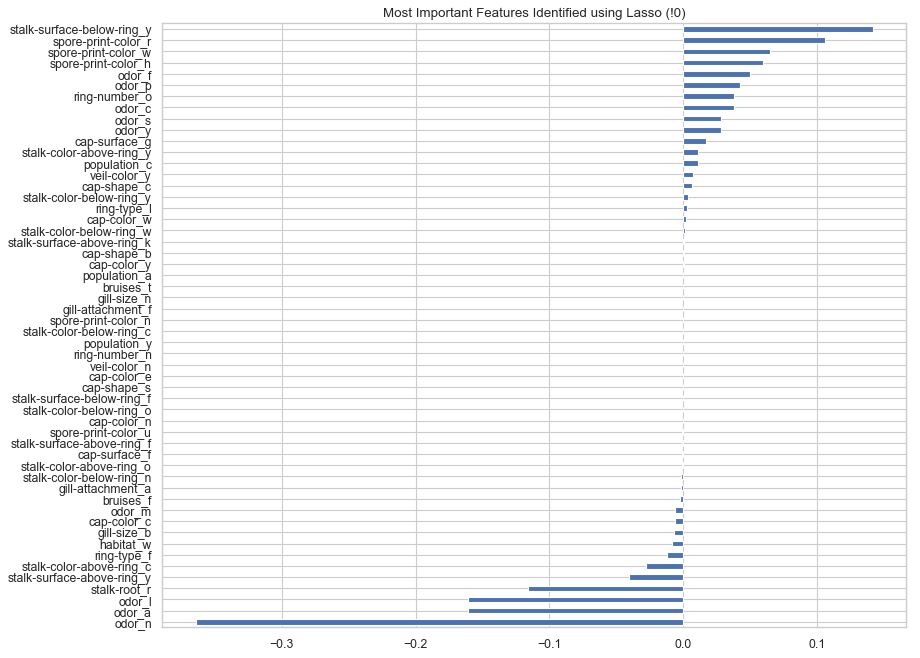

In [126]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")